In [1]:
'''Importing pandas'''
import pandas as pd

In [2]:
'''Load the tweet data'''

tweets_df = pd.read_csv('tweets.csv')

In [3]:
'''Load headlines datasets '''

cnbc = pd.read_csv('cnbc_headlines.csv')
guardian = pd.read_csv('guardian_headlines.csv')
reuters = pd.read_csv('reuters_headlines.csv')

In [4]:
'''Removing unwanted characters from tweet data'''
import re

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.strip()
    return text
tweets_df['tweet'] = tweets_df['body'].apply(clean_text)


In [5]:
'''Drop unneeded columns'''
tweets_df = tweets_df.drop(columns = ['writer', 'comment_num', 'retweet_num',
       'like_num',])

In [6]:
tweets_df.head()

,tweet_id,post_date,body,tweet
0,550441509175443456,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",lx made on AAPL Check it out Learn howtotra...
1,550441672312512512,1420070496,Insanity of today weirdo massive selling. $aap...,Insanity of today weirdo massive selling aapl ...
2,550441732014223360,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,SP Stocks Performance HD LOW SBUX TGT DVN IBM ...
3,550442977802207232,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,GM TSLA Volkswagen Pushes Record Recall Tally...
4,550443807834402816,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,Swing Trading Up To Return In Days swingtra...


In [7]:
'''Importing dataset with ticker_symbol'''

companies_df = pd.read_csv('Company_Tweet.csv')
tweets = pd.merge(tweets_df, companies_df, on='tweet_id', how='inner')
tweets.drop(columns=['tweet_id'], inplace=True)
tweets['post_date'] = pd.to_datetime(tweets['post_date'], unit='s')
tweets.rename(columns={"post_date":"Date"}, inplace = True)

Clean and Combine headlines data  
Tweet data is now in useable form

In [8]:
from datetime import datetime, timedelta
#Removing unneeded Data
def cleanData(dataSet):
    dataSet = dataSet.dropna()
    try:
        dataSet = dataSet.drop('Description', axis=1)
    except:
         print("Headline data set contains no description")
    dataSet = dataSet.drop_duplicates(subset=['Headlines'], keep='first')
    dataSet.reset_index(drop=True, inplace=True)
    return dataSet


In [9]:
'''Converting Date Values To 'datetime64' Format for news dataset'''
def dateConversion(date):
    date = date.replace("Sept", "Sep").replace("March",
"Mar").replace("April", "Apr").replace("June", "Jun").replace("July",
"Jul")
    if date[0].isspace():
        date = date.replace(" ", "0", 1)
        date = date.replace(",  ", ", 0", 1)
    return date



In [10]:
# Guardian

guardian = cleanData(guardian)
guardian["Time"] = pd.to_datetime(guardian["Time"], errors='coerce', format="%d-%b-%y")
guardian.rename(columns={"Time": "Date"}, inplace=True)

# Reuters

reuters = cleanData(reuters)
reuters["Time"] = reuters["Time"].astype("datetime64")
reuters.rename(columns={"Time": "Date"}, inplace=True)


#cnbc 

cnbc = cleanData(cnbc)
dateFormat = '%I:%M %p ET %a, %d %b %Y'
dates = []

for item in cnbc.iloc[:, 1].values:
    item = dateConversion(item)
    dates.append(datetime.strptime(item, dateFormat).strftime("%m-%d-%Y"))

cnbc["Time"] = dates
cnbc["Time"] = cnbc["Time"].astype("datetime64")
cnbc.rename(columns={"Time": "Date"}, inplace=True)

Headline data set contains no description


In [11]:
"""Combine Headline Data"""
dataSets = [cnbc, guardian, reuters]
headlines = pd.concat(dataSets) 
print("Pre Cleaning: ")
headlines.info()
headlines = headlines.sort_values(by="Date")
headlines = cleanData(headlines)
print(" ")
print("Post Cleaning: ")
headlines.info()
headlines.to_csv('headlines.csv')





Pre Cleaning: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53158 entries, 0 to 32574
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Headlines  53158 non-null  object        
 1   Date       53118 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 1.2+ MB
Headline data set contains no description
 
Post Cleaning: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53118 entries, 0 to 53117
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Headlines  53118 non-null  object        
 1   Date       53118 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 830.1+ KB


In [12]:
tweets["Date"] = pd.to_datetime(tweets["Date"])

# Function to convert all datetime64[ns] columns to datetime64
def convert_datetime_columns(tweets):
    for col in tweets.columns:
        if tweets[col].dtype == 'datetime64[ns]':
            tweets[col] = tweets[col].astype('datetime64')
    return tweets


tweets = convert_datetime_columns(tweets)

/var/folders/d6/mnb8zpgx3191n5vvbsw3434m0000gn/T/ipykernel_9388/2474157691.py:7: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  tweets[col] = tweets[col].astype('datetime64')


Now i have two clean datasets i can work with 


In [13]:
headlines.head(20)

,Headlines,Date
0,The Guardian view on Ryanair’s model: a union-...,2017-12-17
1,Peter Preston on press and broadcasting \n\n\...,2017-12-17
2,Why business could prosper under a Corbyn gove...,2017-12-17
3,Youngest staff to be given UK workplace pensio...,2017-12-17
4,Grogonomics \n\n\n This year has been about ...,2017-12-17
5,Butchers carve out a niche as UK shoppers opt ...,2017-12-17
6,David Cameron to lead £750m UK-China investmen...,2017-12-17
7,US mall operators must buy into e-retail and n...,2017-12-17
8,Global shopping centre giants go on a Christma...,2017-12-17
9,Is the global desire to buy British a bad thin...,2017-12-17


In [14]:
tweets.head()

,Date,body,tweet,ticker_symbol
0,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",lx made on AAPL Check it out Learn howtotra...,AAPL
1,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,Insanity of today weirdo massive selling aapl ...,AAPL
2,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,SP Stocks Performance HD LOW SBUX TGT DVN IBM ...,AMZN
3,2015-01-01 00:06:47,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,GM TSLA Volkswagen Pushes Record Recall Tally...,TSLA
4,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,Swing Trading Up To Return In Days swingtra...,AAPL


Obtaining the min and max dates in each dataframe 

In [15]:
# Get the minimum and maximum dates
tweets_min_date = tweets['Date'].min()
tweets_max_date = tweets['Date'].max()
headlines_min_date = headlines['Date'].min()
headlines_max_date = headlines['Date'].max()
print(f"Minimum date in tweets: {tweets_min_date}") 
print(f"Maximum date in tweets: {tweets_max_date}") 
print(f"Minimum date in headlines: {headlines_min_date}") 
print(f"Maximum date in headlines: {headlines_max_date}") 

Minimum date in tweets: 2015-01-01 00:00:57
Maximum date in tweets: 2019-12-31 23:55:53
Minimum date in headlines: 2017-12-17 00:00:00
Maximum date in headlines: 2020-07-18 00:00:00


In [16]:


# Filtering headlines dataframe
headlines['Date'] = pd.to_datetime(headlines['Date'])
start_date = '2017-12-17 00:00:00'
end_date = '2019-12-31 23:55:53'
filtered_headlines = headlines[(headlines['Date'] >= start_date) & (headlines['Date'] <= end_date)]

# Filtering tweets dataframe
tweets['Date'] = pd.to_datetime(tweets['Date'])
filtered_tweets = tweets[(tweets['Date'] >= start_date) & (tweets['Date'] <= end_date)]

print(filtered_headlines.head())
print(filtered_tweets.head())

                                           Headlines       Date
0  The Guardian view on Ryanair’s model: a union-... 2017-12-17
1  Peter Preston on press and broadcasting  \n\n\... 2017-12-17
2  Why business could prosper under a Corbyn gove... 2017-12-17
3  Youngest staff to be given UK workplace pensio... 2017-12-17
4  Grogonomics  \n\n\n  This year has been about ... 2017-12-17
                       Date  \
2495117 2017-12-17 00:00:05   
2495118 2017-12-17 00:00:22   
2495119 2017-12-17 00:00:22   
2495120 2017-12-17 00:00:41   
2495121 2017-12-17 00:03:03   

                                                      body  \
2495117  $MSFT $86.85 (+2.55%) is a top mover.  Try our...   
2495118  Don't miss our next FREE OPTION TRADE.  Sign u...   
2495119  Don't miss our next FREE OPTION TRADE.  Sign u...   
2495120  A little stroll through the new Marina Del Rey...   
2495121  Some #Tesla porn. Marina del Rey delivery cent...   

                                                     twe

In [17]:
filtered_headlines.shape

(39304, 2)

Importing needed libraries for the rest of the project

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import nltk
import yfinance as yf
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, words
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag
from collections import Counter
import spacy
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [19]:

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

sid = SentimentIntensityAnalyzer()

# Lemmatisation function
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
NER = spacy.load("en_core_web_sm")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/charles/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/charles/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/charles/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/charles/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
'''Pre-processing function '''

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', " ", text.lower()).split()
    text = [word for word in text if word not in stopwords.words('english')] #stop words are the words we want to take out , so if word not in stop words we have it in
    text = [lemmatizer.lemmatize(word) for word in text]
    text = [stemmer.stem(word) for word in text]
    return text


In [21]:
def named_entity_recognition(text):
    doc = NER(text)
    entities = [ent.text for ent in doc.ents]
    return entities

In [22]:
# Apply preprocessing to headlines
headlines['Processed_Headlines'] = headlines['Headlines'].apply(preprocess_text)

# Filter headlines and tweets based on date range
start_date = '2017-12-17 00:00:00'
end_date = '2019-12-31 23:55:53'
headlines['Date'] = pd.to_datetime(headlines['Date'])
tweets['Date'] = pd.to_datetime(tweets['Date'])
filtered_headlines = headlines[(headlines['Date'] >= start_date) & (headlines['Date'] <= end_date)]
filtered_tweets = tweets[(tweets['Date'] >= start_date) & (tweets['Date'] <= end_date)]

In [23]:
# Filter stocks and dates
stock_symbols = ['AAPL', 'GOOGL', 'TSLA', 'MSFT', 'AMZN']
start_date = '2017-12-17'
end_date = '2019-12-31'

stock_data = {symbol: yf.download(symbol, start=start_date, end=end_date)[['Close']] for symbol in stock_symbols}
stock_df = pd.concat(stock_data, axis=1)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


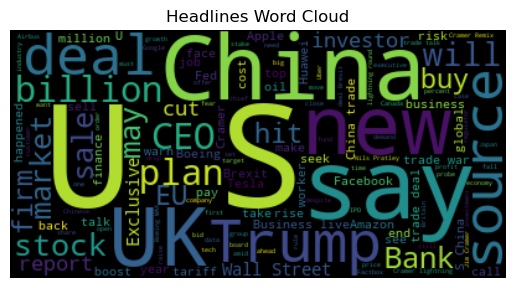

In [24]:
# Generate word cloud for headlines
def generate_wordcloud(data, title):
    text = " ".join(data)
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=250).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

generate_wordcloud(filtered_headlines['Headlines'], 'Headlines Word Cloud')

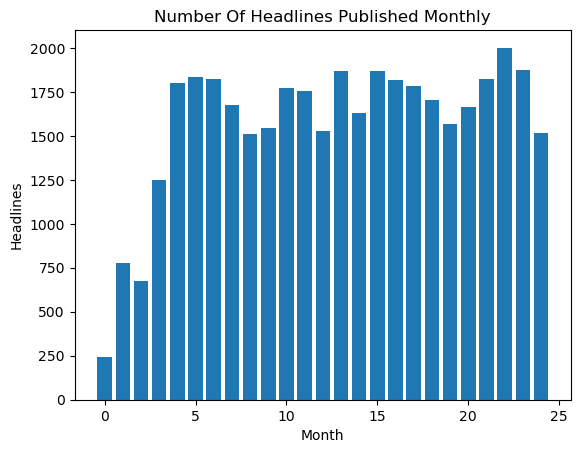

In [25]:

# Plot frequency distribution of headlines
def plot_frequency_distribution(data, title, xlabel, ylabel):
    data_freq = data.groupby([data.dt.year, data.dt.month]).count().tolist()
    plt.bar(list(range(len(data_freq))), data_freq)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
plot_frequency_distribution(filtered_headlines['Date'], 'Number Of Headlines Published Monthly', 'Month', 'Headlines')

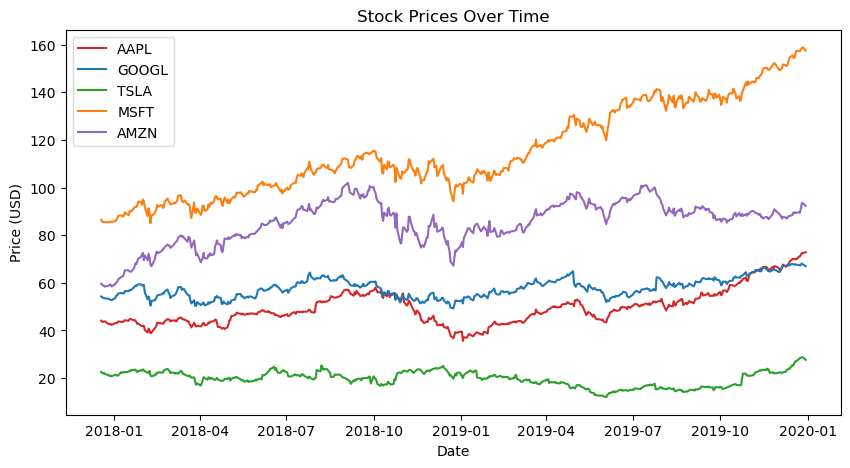

In [26]:
# Plot time series for stock prices
plt.figure(figsize=(10, 5))
plt.plot(stock_df.index, stock_df[('AAPL', 'Close')], 'tab:red', label='AAPL')
plt.plot(stock_df.index, stock_df[('GOOGL', 'Close')], 'tab:blue', label='GOOGL')
plt.plot(stock_df.index, stock_df[('TSLA', 'Close')], 'tab:green', label='TSLA')
plt.plot(stock_df.index, stock_df[('MSFT', 'Close')], 'tab:orange', label='MSFT')
plt.plot(stock_df.index, stock_df[('AMZN', 'Close')], 'tab:purple', label='AMZN')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [27]:
# Label headlines with corresponding stock ticker symbols
stock_keywords = {
    'AAPL': ['AAPL', 'Apple'],
    'GOOGL': ['GOOGL', 'Google', 'Alphabet'],
    'TSLA': ['TSLA', 'Tesla'],
    'MSFT': ['MSFT', 'Microsoft'],
    'AMZN': ['AMZN', 'Amazon']
}

def label_headline(headline):
    for ticker, keywords in stock_keywords.items():
        for keyword in keywords:
            if keyword.lower() in headline.lower():
                return ticker
    return None

filtered_headlines['Stock'] = filtered_headlines['Headlines'].apply(label_headline)


/var/folders/d6/mnb8zpgx3191n5vvbsw3434m0000gn/T/ipykernel_9388/969870363.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_headlines['Stock'] = filtered_headlines['Headlines'].apply(label_headline)


## Sentiment analysis on headline data

In [28]:
# Sentiment analysis on headlines
filtered_headlines['Sentiment_Score'] = filtered_headlines['Processed_Headlines'].apply(lambda x: sid.polarity_scores(' '.join(x))['compound'])

/var/folders/d6/mnb8zpgx3191n5vvbsw3434m0000gn/T/ipykernel_9388/3011494802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_headlines['Sentiment_Score'] = filtered_headlines['Processed_Headlines'].apply(lambda x: sid.polarity_scores(' '.join(x))['compound'])


In [29]:
# Feature extraction for headlines
def feature_extraction(words, document):
    word_frequency = dict.fromkeys(words, 0)
    for word in document:
        if word in words:
            word_frequency[word] = document.count(word)
    return word_frequency



In [30]:
'''Load and Preprocess the labelled finance news dataset for training the headlines model'''


labelled_news = pd.read_csv("labelled finance news.csv", names=['Sentiment', 'Headlines'])
labelled_news['Processed_Headlines'] = labelled_news['Headlines'].apply(preprocess_text)

In [31]:
# Prepare training data for headlines
def prepare_training_data_from_labelled_news(labelled_news):
    X = []
    y = []
    for index, row in labelled_news.iterrows():
        features = feature_extraction(word_set, row['Processed_Headlines'])
        X.append(features)
        y.append(row['Sentiment'])
    return X, y

# Create a word set based on the filtered headlines
word_set = set([word for text in filtered_headlines['Processed_Headlines'] for word in text])

# Prepare the training data
X_headlines, y_headlines = prepare_training_data_from_labelled_news(labelled_news)

# Convert list of dictionaries to a dataFrame and  numpy array
X_headlines_df = pd.DataFrame(X_headlines).fillna(0)
X_headlines_array = X_headlines_df.values

Train than evaluate the classifers 

Accuracy: 0.6958762886597938
Recall: 0.5299985474583552
Precision: 0.7140398694890976
F1 Score: 0.5601854772544298


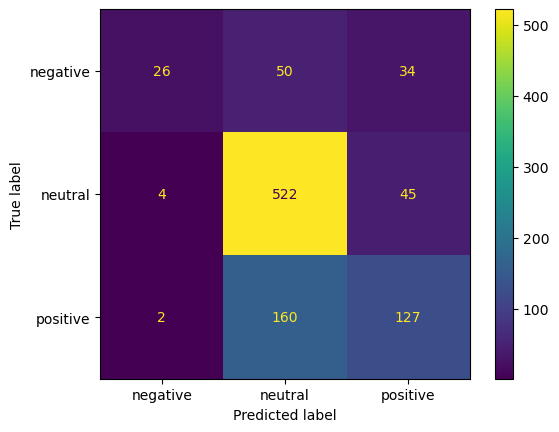

Accuracy: 0.7298969072164948
Recall: 0.579461410045161
Precision: 0.7630171680741262
F1 Score: 0.6162368155027903


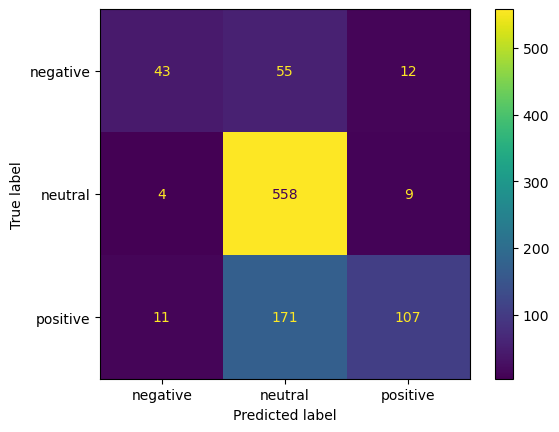

Accuracy: 0.7608247422680412
Recall: 0.6870210354106149
Precision: 0.7341084730509406
F1 Score: 0.7048181440867056


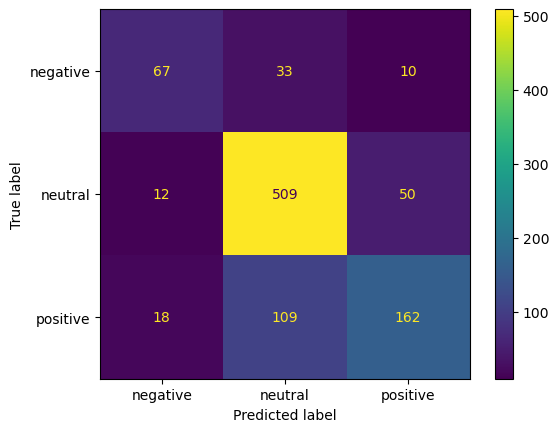

In [32]:
# Train, test split
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_headlines_array, y_headlines, test_size=0.2, random_state=42)

# Function to evaluate classifiers 
def evaluate_classifier(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
    plt.show()


# Train Naive Bayes classifier for headlines  
nb_classifier_h = MultinomialNB()
nb_classifier_h.fit(X_train_h, y_train_h)

# Train SVM and Logistic Regression classifiers for headlines
svm_classifier_h = SVC()
svm_classifier_h.fit(X_train_h, y_train_h)
lr_classifier_h = LogisticRegression(max_iter=500)
lr_classifier_h.fit(X_train_h, y_train_h)

# Evaluate the classifiers for headlines
evaluate_classifier(nb_classifier_h, X_test_h, y_test_h)
evaluate_classifier(svm_classifier_h, X_test_h, y_test_h)
evaluate_classifier(lr_classifier_h, X_test_h, y_test_h)

Will now re-train and evaluate with the Logistic regression classifer

Accuracy: 0.7608247422680412
Recall: 0.6870210354106149
Precision: 0.7341084730509406
F1 Score: 0.7048181440867056


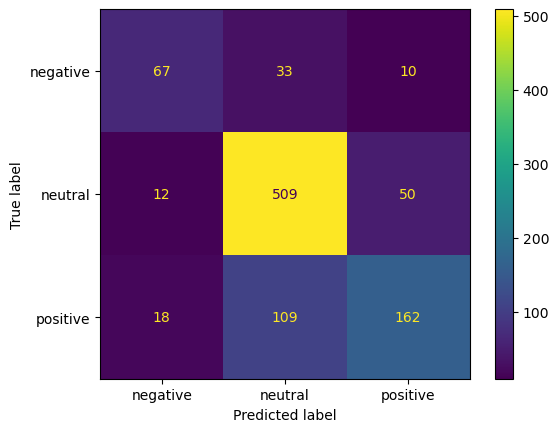

Text: Twitter's stock is soaring after new product release -> Predicted Sentiment: neutral


In [33]:
# re-training Logistic Regression classifier 
lr_classifier_h = LogisticRegression(max_iter=500)
lr_classifier_h.fit(X_train_h, y_train_h)

# Evaluate Logistic Regression classifier 
evaluate_classifier(lr_classifier_h, X_test_h, y_test_h)

# Example usage for predicting sentiment on new data
new_data = ["Twitter's stock is soaring after new product release"]
new_data_processed = [preprocess_text(text) for text in new_data]
new_data_features = pd.DataFrame([feature_extraction(word_set, text) for text in new_data_processed]).fillna(0).values
predictions = lr_classifier_h.predict(new_data_features)

for text, prediction in zip(new_data, predictions):
    print(f"Text: {text} -> Predicted Sentiment: {prediction}")

Not happy with output so will try TF-IDF feature engineering 

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TF-IDF for feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(labelled_news['Processed_Headlines'].apply(lambda x: ' '.join(x)))

# Convert the target variable to a numpy array
y = labelled_news['Sentiment'].values

# Split the data
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X, y, test_size=0.2, random_state=42)

Hyper parameter tuning using grid search 

Accuracy: 0.7494845360824742
Recall: 0.6576095094283909
Precision: 0.7349676444430981
F1 Score: 0.6857050969257031


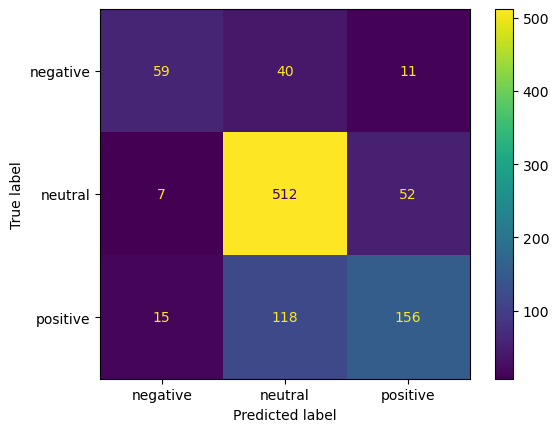

In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Initialise model
lr_classifier_h = LogisticRegression(max_iter=500)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=lr_classifier_h, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_h, y_train_h)

# Get the best parameters and train the model
best_params = grid_search.best_params_
lr_classifier_h = LogisticRegression(**best_params, max_iter=500)
lr_classifier_h.fit(X_train_h, y_train_h)

# Evaluate the model
evaluate_classifier(lr_classifier_h, X_test_h, y_test_h)

In [36]:
new_data = ["Twitter has seen a huge uptick in revenue  "]
new_data_processed = [preprocess_text(text) for text in new_data]
new_data_features = vectorizer.transform([' '.join(text) for text in new_data_processed])
predictions = lr_classifier_h.predict(new_data_features)

for text, prediction in zip(new_data, predictions):
    print(f"Text: {text} -> Predicted Sentiment: {prediction}")

Text: Twitter has seen a huge uptick in revenue   -> Predicted Sentiment: neutral


Model is still not improved - will try to improve

In [37]:
#re-load and pre-process labelled finance news dataset
labelled_news = pd.read_csv("labelled finance news.csv", names=['Sentiment', 'Headlines'])
labelled_news['Processed_Headlines'] = labelled_news['Headlines'].apply(preprocess_text)

In [38]:
# Use TF-IDF for feature extraction with bigrams
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(labelled_news['Processed_Headlines'].apply(lambda x: ' '.join(x)))

# Convert the target variable to a numpy array
y = labelled_news['Sentiment'].values

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X, y, test_size=0.3, random_state=42) #increase test size

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [39]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV


lr_classifier_h = LogisticRegression(max_iter=500)

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=lr_classifier_h, param_distributions=param_distributions, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_h, y_train_h)

# Set parameters and train the model
best_params = random_search.best_params_
lr_classifier_h = LogisticRegression(**best_params, max_iter=500)
lr_classifier_h.fit(X_train_h, y_train_h)

/Users/charles/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 25 is smaller than n_iter=50. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


LogisticRegression(C=10, max_iter=500, solver='liblinear')

Accuracy: 0.7524071526822559
Recall: 0.6635368902127493
Precision: 0.7491118308507153
F1 Score: 0.6941287426555339


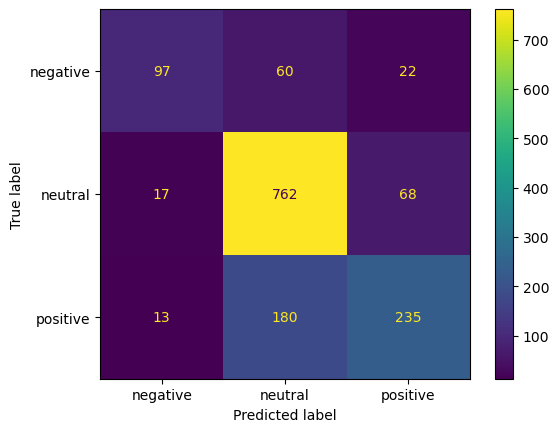

In [40]:
evaluate_classifier(lr_classifier_h, X_test_h, y_test_h)


In [41]:
new_data = ["Twitter has seen a huge uptick in revenue "]
new_data_processed = [preprocess_text(text) for text in new_data]
new_data_features = vectorizer.transform([' '.join(text) for text in new_data_processed])
predictions = lr_classifier_h.predict(new_data_features)

for text, prediction in zip(new_data, predictions):
    print(f"Text: {text} -> Predicted Sentiment: {prediction}")

Text: Twitter has seen a huge uptick in revenue  -> Predicted Sentiment: neutral


In [42]:
# Predict sentiment for all headlines
headlines['Processed_Headlines'] = headlines['Headlines'].apply(preprocess_text)
headlines['Sentiment_Pred'] = lr_classifier_h.predict(vectorizer.transform(headlines['Processed_Headlines'].apply(lambda x: ' '.join(x))))

Encoding sentiment scores using LabelEncoder()

In [43]:
# Map sentiment predictions to -1, 0, 1
sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
headlines['Sentiment_Pred_Mapped'] = headlines['Sentiment_Pred'].map(sentiment_mapping)

# Filter headlines 
start_date = '2017-12-17'
end_date = '2019-12-31'
headlines['Date'] = pd.to_datetime(headlines['Date'])
filtered_headlines = headlines[(headlines['Date'] >= start_date) & (headlines['Date'] <= end_date)]

# Group by date and compute mean sentiment score
daily_sentiment = filtered_headlines.groupby('Date')['Sentiment_Pred_Mapped'].mean().reset_index()

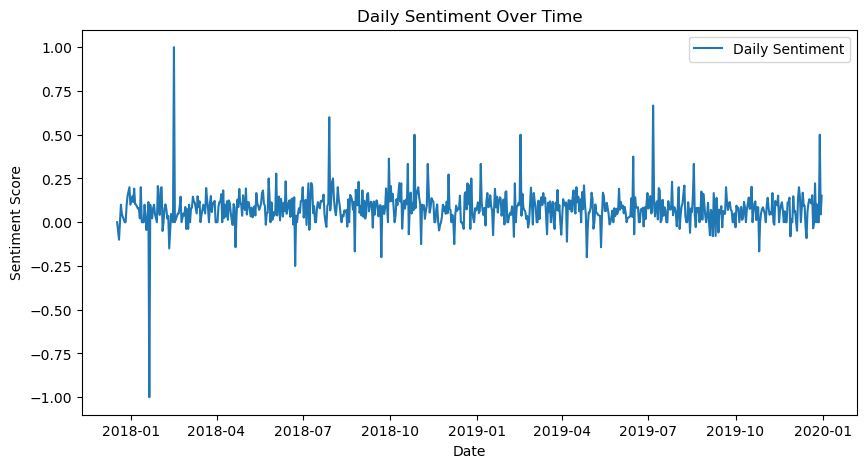

In [44]:
# Plot sentiment over time
plt.figure(figsize=(10, 5))
plt.plot(daily_sentiment['Date'], daily_sentiment['Sentiment_Pred_Mapped'], label='Daily Sentiment')
plt.title('Daily Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()


In [45]:
# Calulate daily tweet frequency
filtered_tweets['Date'] = pd.to_datetime(filtered_tweets['Date']).dt.date
tweet_frequency = filtered_tweets.groupby(['Date', 'ticker_symbol']).size().unstack(fill_value=0)


daily_sentiment['Date'] = pd.to_datetime(daily_sentiment['Date'])
tweet_frequency.index = pd.to_datetime(tweet_frequency.index)
stock_df.index = pd.to_datetime(stock_df.index)

merged_data = daily_sentiment.merge(tweet_frequency, left_on='Date', right_index=True, how='left').merge(stock_df, left_on='Date', right_index=True, how='left')



/var/folders/d6/mnb8zpgx3191n5vvbsw3434m0000gn/T/ipykernel_9388/2234118946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tweets['Date'] = pd.to_datetime(filtered_tweets['Date']).dt.date
/var/folders/d6/mnb8zpgx3191n5vvbsw3434m0000gn/T/ipykernel_9388/2234118946.py:10: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  merged_data = daily_sentiment.merge(tweet_frequency, left_on='Date', right_index=True, how='left').merge(stock_df, left_on='Date', right_index=True, how='left')


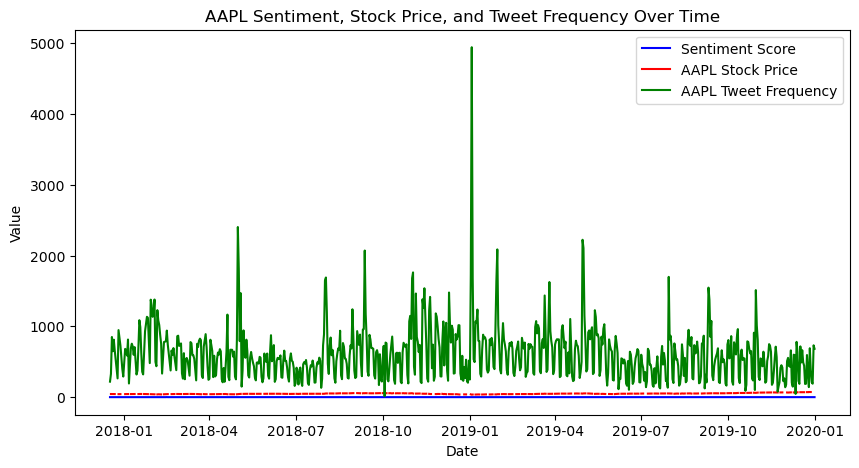

In [46]:
# Plot tweet frequency, sentiment, and stock prices for a specific stock (e.g., AAPL)
plt.figure(figsize=(10, 5))
plt.plot(merged_data['Date'], merged_data['Sentiment_Pred_Mapped'], label='Sentiment Score', color='blue')
plt.plot(merged_data['Date'], merged_data[('AAPL', 'Close')], label='AAPL Stock Price', color='red')
plt.plot(merged_data['Date'], merged_data['AAPL'], label='AAPL Tweet Frequency', color='green')
plt.title('AAPL Sentiment, Stock Price, and Tweet Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [47]:
'''Function for finding correlation between headline sentiment and stock price'''

def compute_correlations(merged_data, sentiment_col, stock_symbols):
    correlations = {}
    for stock in stock_symbols:
        stock_close_col = (stock, 'Close')
        correlation = merged_data[sentiment_col].corr(merged_data[stock_close_col])
        correlations[stock] = correlation
    return correlations

# List of stock symbols of interest
stock_symbols = ['AAPL', 'GOOGL', 'TSLA', 'MSFT', 'AMZN']

# Compute correlations
correlations = compute_correlations(merged_data, 'Sentiment_Pred_Mapped', stock_symbols)

# Display correlations
for stock, correlation in correlations.items():
    print(f"Correlation between daily headline sentiment and {stock} stock price: {correlation:.2f}")

Correlation between daily headline sentiment and AAPL stock price: 0.01
Correlation between daily headline sentiment and GOOGL stock price: 0.01
Correlation between daily headline sentiment and TSLA stock price: 0.06
Correlation between daily headline sentiment and MSFT stock price: -0.06
Correlation between daily headline sentiment and AMZN stock price: 0.03


In [48]:
merged_data['Sentiment_Pred_Mapped'].mean()

0.07889352766070103

In [49]:
headlines.head()

,Headlines,Date,Processed_Headlines,Sentiment_Pred,Sentiment_Pred_Mapped
0,The Guardian view on Ryanair’s model: a union-...,2017-12-17,"[guardian, view, ryanair, model, union, friend...",neutral,0
1,Peter Preston on press and broadcasting \n\n\...,2017-12-17,"[peter, preston, press, broadcast, paul, dacr,...",neutral,0
2,Why business could prosper under a Corbyn gove...,2017-12-17,"[busi, could, prosper, corbyn, govern]",neutral,0
3,Youngest staff to be given UK workplace pensio...,2017-12-17,"[youngest, staff, given, uk, workplac, pension...",negative,-1
4,Grogonomics \n\n\n This year has been about ...,2017-12-17,"[grogonom, year, compani, job, wage]",negative,-1


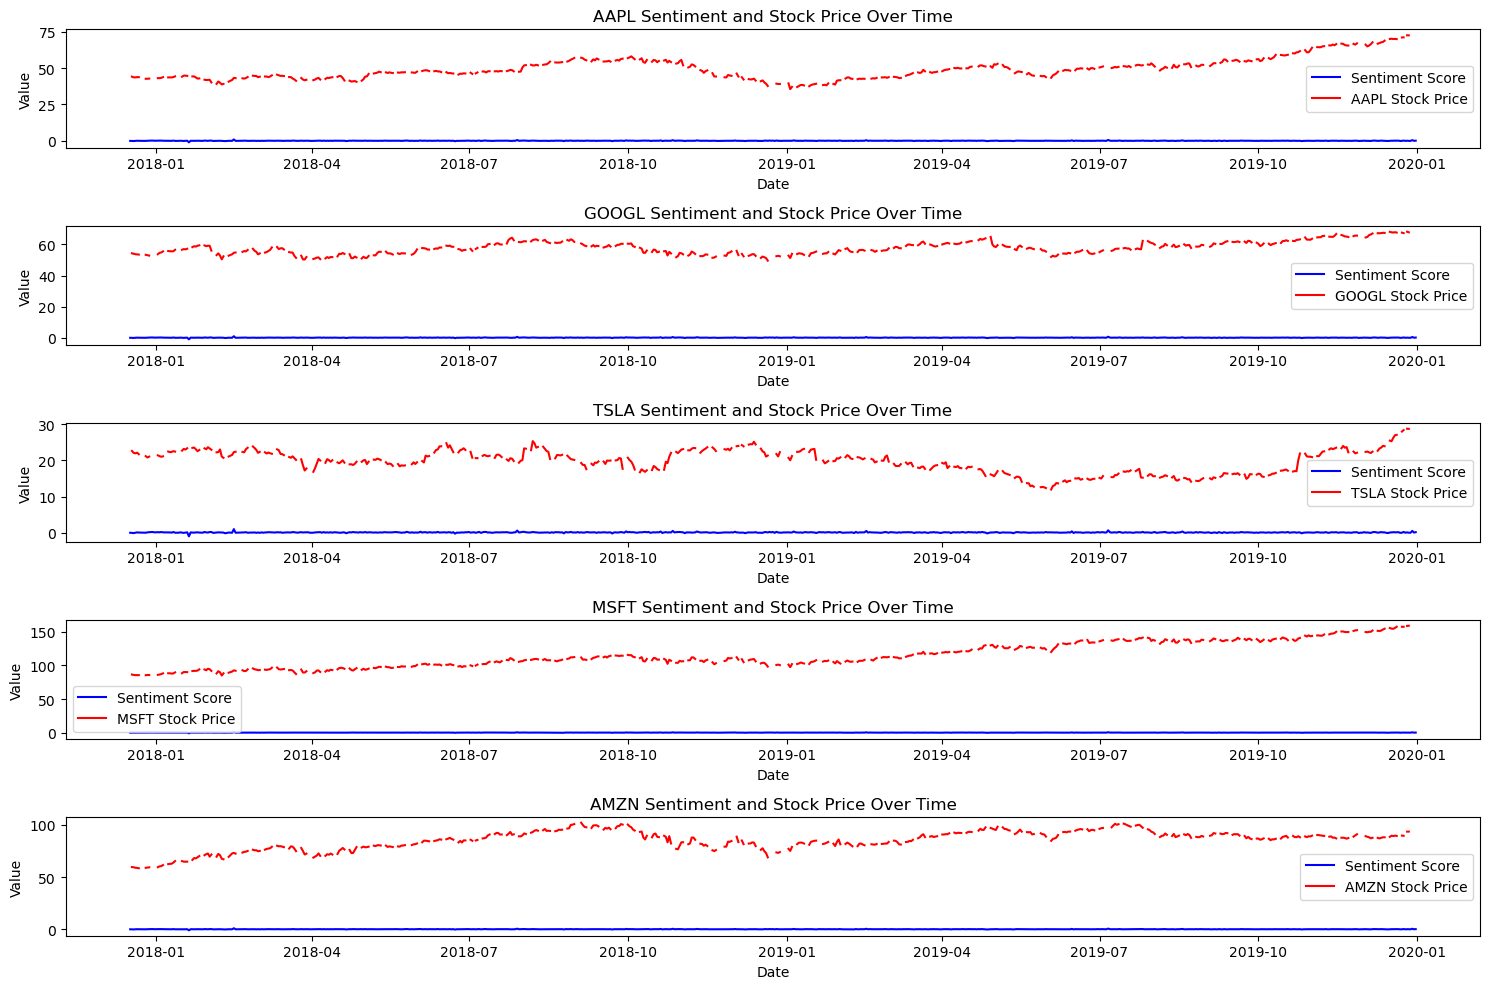

In [50]:
plt.figure(figsize=(15, 10))

for stock in stock_symbols:
    plt.subplot(len(stock_symbols), 1, stock_symbols.index(stock) + 1)
    plt.plot(merged_data['Date'], merged_data['Sentiment_Pred_Mapped'], label='Sentiment Score', color='blue')
    plt.plot(merged_data['Date'], merged_data[(stock, 'Close')], label=f'{stock} Stock Price', color='red')
    plt.title(f'{stock} Sentiment and Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()

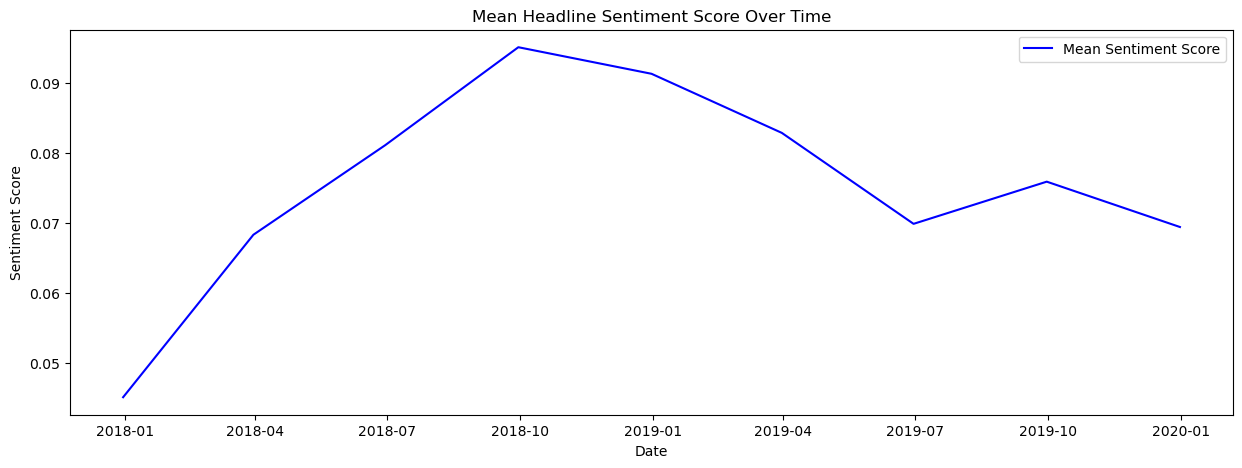

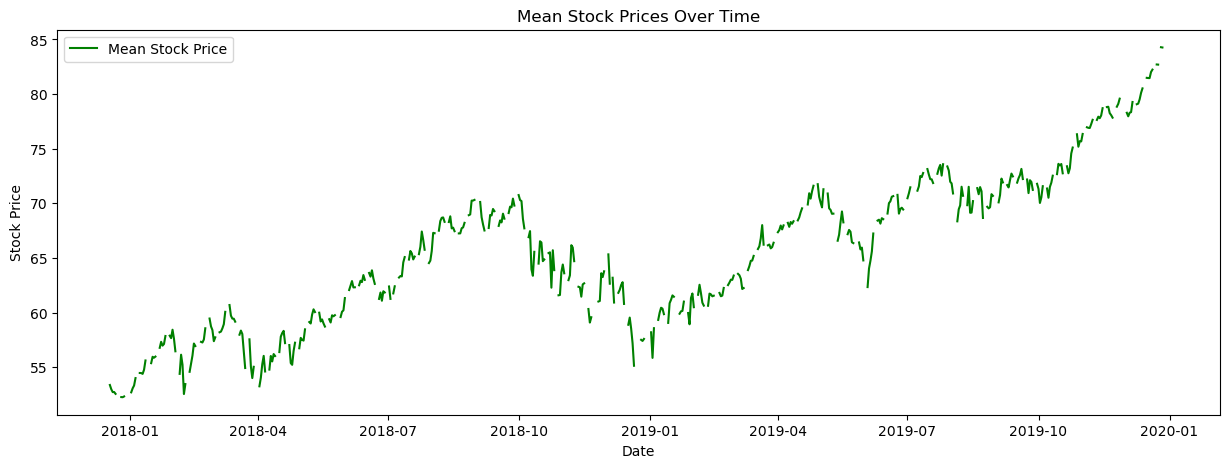

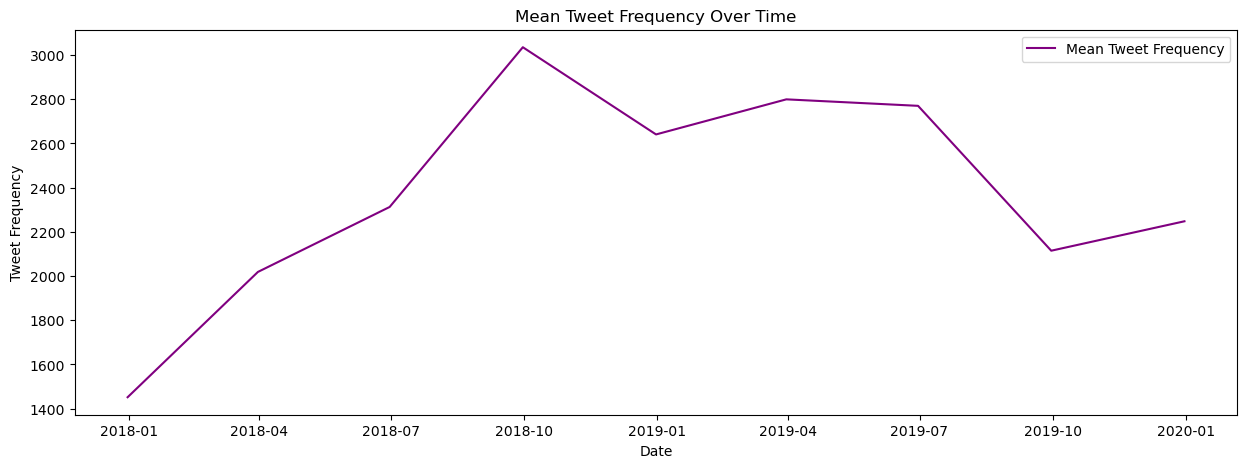

In [51]:



daily_sentiment['Date'] = pd.to_datetime(daily_sentiment['Date'])


mean_tweet_frequency = filtered_tweets.groupby('Date').size().reset_index(name='Frequency')  # Calculate mean tweet frequency per day
mean_tweet_frequency['Date'] = pd.to_datetime(mean_tweet_frequency['Date'])

# Resample sentiment data to show one data point every few months (e.g., quarterly)
resampled_sentiment = daily_sentiment.set_index('Date').resample('3M').mean().reset_index()

mean_stock_prices = merged_data[['Date'] + [(stock, 'Close') for stock in stock_symbols]].set_index('Date').mean(axis=1).reset_index()
mean_stock_prices.columns = ['Date', 'Mean_Close']


mean_tweet_frequency['Date'] = pd.to_datetime(mean_tweet_frequency['Date'])

# Resample tweet frequency data to one data point quarterly
resampled_tweet_frequency = mean_tweet_frequency.set_index('Date').resample('3M').mean().reset_index()

# Plot mean sentiment score over time
plt.figure(figsize=(15, 5))
plt.plot(resampled_sentiment['Date'], resampled_sentiment['Sentiment_Pred_Mapped'], label='Mean Sentiment Score', color='blue')
plt.title('Mean Headline Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

# Plot mean stock prices over time
plt.figure(figsize=(15, 5))
plt.plot(mean_stock_prices['Date'], mean_stock_prices['Mean_Close'], label='Mean Stock Price', color='green')
plt.title('Mean Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot mean tweet frequency over time
plt.figure(figsize=(15, 5))
plt.plot(resampled_tweet_frequency['Date'], resampled_tweet_frequency['Frequency'], label='Mean Tweet Frequency', color='purple')
plt.title('Mean Tweet Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Frequency')
plt.legend()
plt.show()

In [52]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


tweets_copy = filtered_tweets.copy()
tweets_copy['Date'] = pd.to_datetime(tweets_copy['Date'])
analyzer = SentimentIntensityAnalyzer()
#  function for VADER sentiment score
def get_vader_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # The 'compound' score is a normalized score between -1 and 1

# Apply the VADER sentiment analysis to the tweets
tweets_copy['Sentiment_Score'] = tweets_copy['tweet'].apply(get_vader_sentiment)

# Calculate mean sentiment score per day
daily_tweet_sentiment = tweets_copy.groupby('Date')['Sentiment_Score'].mean().reset_index()

resampled_tweet_sentiment = daily_tweet_sentiment.set_index('Date').resample('3M').mean().reset_index()



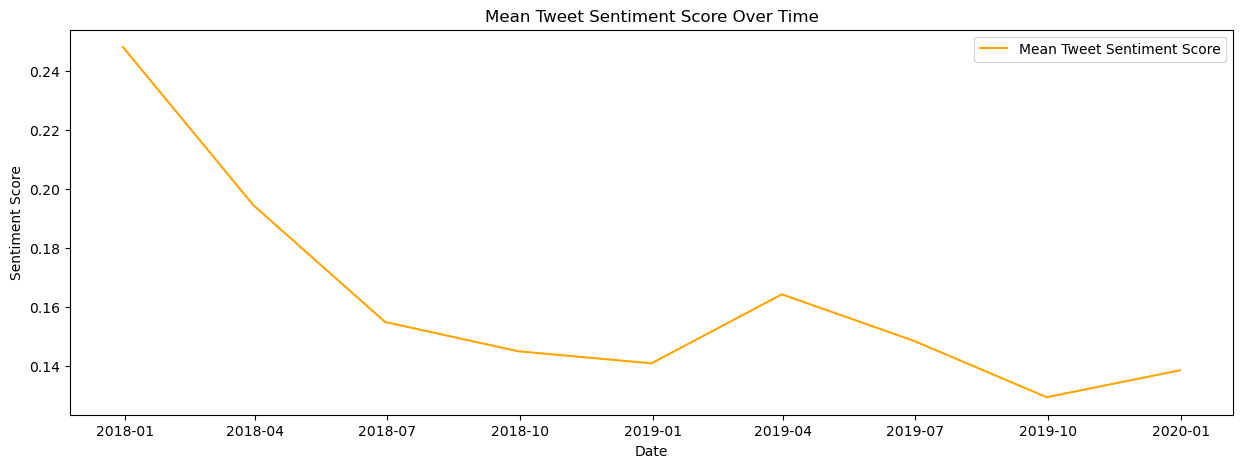

In [53]:
# Plot mean tweet sentiment score over time
plt.figure(figsize=(15, 5))
sns.lineplot(x='Date', y='Sentiment_Score', data=resampled_tweet_sentiment, label='Mean Tweet Sentiment Score', color='orange')
plt.title('Mean Tweet Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

In [54]:
def compute_tweet_stock_correlations(tweet_data, stock_data, stock_symbols):
    correlations = {}
    for stock in stock_symbols:
        stock_close_col = (stock, 'Close')
        
        tweet_data['Date'] = pd.to_datetime(tweet_data['Date'])
        stock_data.index = pd.to_datetime(stock_data.index)
        
     
        merged_data = tweet_data.merge(stock_data[[stock_close_col]], left_on='Date', right_index=True)
        
        
        correlation = merged_data['Sentiment_Score'].corr(merged_data[stock_close_col])
        correlations[stock] = correlation
    return correlations


stock_symbols = ['AAPL', 'GOOGL', 'TSLA', 'MSFT', 'AMZN']
tweet_stock_correlations = compute_tweet_stock_correlations(daily_tweet_sentiment, stock_df, stock_symbols)

# Display correlations
for stock, correlation in tweet_stock_correlations.items():
    print(f"Correlation between daily tweet sentiment and {stock} stock price: {correlation:.2f}")

Correlation between daily tweet sentiment and AAPL stock price: -0.21
Correlation between daily tweet sentiment and GOOGL stock price: -0.09
Correlation between daily tweet sentiment and TSLA stock price: 0.31
Correlation between daily tweet sentiment and MSFT stock price: -0.31
Correlation between daily tweet sentiment and AMZN stock price: -0.40


/var/folders/d6/mnb8zpgx3191n5vvbsw3434m0000gn/T/ipykernel_9388/1845198249.py:10: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  merged_data = tweet_data.merge(stock_data[[stock_close_col]], left_on='Date', right_index=True)
/var/folders/d6/mnb8zpgx3191n5vvbsw3434m0000gn/T/ipykernel_9388/1845198249.py:10: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  merged_data = tweet_data.merge(stock_data[[stock_close_col]], left_on='Date', right_index=True)
/var/folders/d6/mnb8zpgx3191n5vvbsw3434m0000gn/T/ipykernel_9388/1845198249.py:10: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  merged_data = tweet_data.merge(stock_data[[stock_close_col]], left_on='Date', right_index=True)
/var/folders/d6/mnb8zpgx3191n5vvbs

In [55]:
def compute_tweet_headline_correlations(daily_tweet_sentiment, headline_data):
    # Ensure the Date columns are datetime
    daily_tweet_sentiment['Date'] = pd.to_datetime(daily_tweet_sentiment['Date'])
    headline_data['Date'] = pd.to_datetime(headline_data['Date'])
    daily_headline_sentiment = headline_data.groupby('Date')['Sentiment_Pred_Mapped'].mean().reset_index()
    merged_data = daily_tweet_sentiment.merge(daily_headline_sentiment, on='Date', how='inner')
    correlation = merged_data['Sentiment_Score'].corr(merged_data['Sentiment_Pred_Mapped'])
    return correlation

tweet_headline_correlation = compute_tweet_headline_correlations(daily_tweet_sentiment, filtered_headlines)


print(f"daily tweet sentiment and daily headline sentiment correlation: {tweet_headline_correlation:.2f}")

daily tweet sentiment and daily headline sentiment correlation: -0.07


/var/folders/d6/mnb8zpgx3191n5vvbsw3434m0000gn/T/ipykernel_9388/1012768332.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headline_data['Date'] = pd.to_datetime(headline_data['Date'])


In [56]:
tweet_stock_correlations = {
    'AAPL': -0.21,
    'GOOGL': -0.09,
    'TSLA': 0.31,
    'MSFT': -0.31,
    'AMZN': -0.40
}

print("Tweet Sentiment and Stock Price Correlations:")
for stock, correlation in tweet_stock_correlations.items():
    print(f"Correlation between daily tweet sentiment and {stock} stock price: {correlation:.2f}")



headline_stock_correlations = {
    'AAPL': 0.01,
    'GOOGL': 0.01,
    'TSLA': 0.06,
    'MSFT': -0.06,
    'AMZN': 0.03
}

print("Headline Sentiment and Stock Price Correlations:")
for stock, correlation in headline_stock_correlations.items():
    print(f"Correlation between daily headline sentiment and {stock} stock price: {correlation:.2f}")


    

Tweet Sentiment and Stock Price Correlations:
Correlation between daily tweet sentiment and AAPL stock price: -0.21
Correlation between daily tweet sentiment and GOOGL stock price: -0.09
Correlation between daily tweet sentiment and TSLA stock price: 0.31
Correlation between daily tweet sentiment and MSFT stock price: -0.31
Correlation between daily tweet sentiment and AMZN stock price: -0.40
Headline Sentiment and Stock Price Correlations:
Correlation between daily headline sentiment and AAPL stock price: 0.01
Correlation between daily headline sentiment and GOOGL stock price: 0.01
Correlation between daily headline sentiment and TSLA stock price: 0.06
Correlation between daily headline sentiment and MSFT stock price: -0.06
Correlation between daily headline sentiment and AMZN stock price: 0.03


Comparison dataframe creation 

In [57]:

comparison_data = {
    'Stock': stock_symbols,
    'Tweet Sentiment Correlation': [tweet_stock_correlations[stock] for stock in stock_symbols],
    'Headline Sentiment Correlation': [headline_stock_correlations[stock] for stock in stock_symbols]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

   Stock  Tweet Sentiment Correlation  Headline Sentiment Correlation
0   AAPL                        -0.21                            0.01
1  GOOGL                        -0.09                            0.01
2   TSLA                         0.31                            0.06
3   MSFT                        -0.31                           -0.06
4   AMZN                        -0.40                            0.03


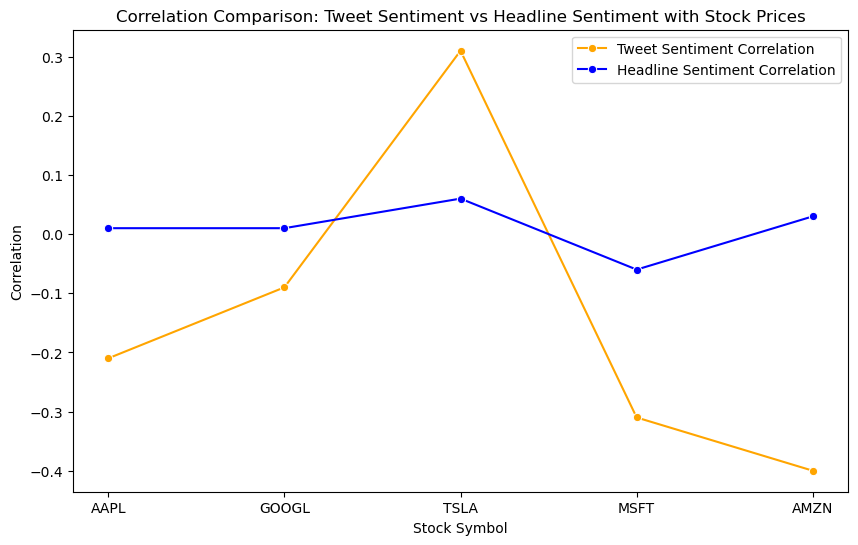

In [58]:



plt.figure(figsize=(10, 6))

# Plot tweet sentiment correlations
sns.lineplot(data=comparison_df, x='Stock', y='Tweet Sentiment Correlation', marker='o', label='Tweet Sentiment Correlation', color='orange')

# Plot headline sentiment correlations
sns.lineplot(data=comparison_df, x='Stock', y='Headline Sentiment Correlation', marker='o', label='Headline Sentiment Correlation', color='blue')


plt.title('Correlation Comparison: Tweet Sentiment vs Headline Sentiment with Stock Prices')
plt.xlabel('Stock Symbol')
plt.ylabel('Correlation')
plt.legend()


plt.show()

Plot with line of best fit

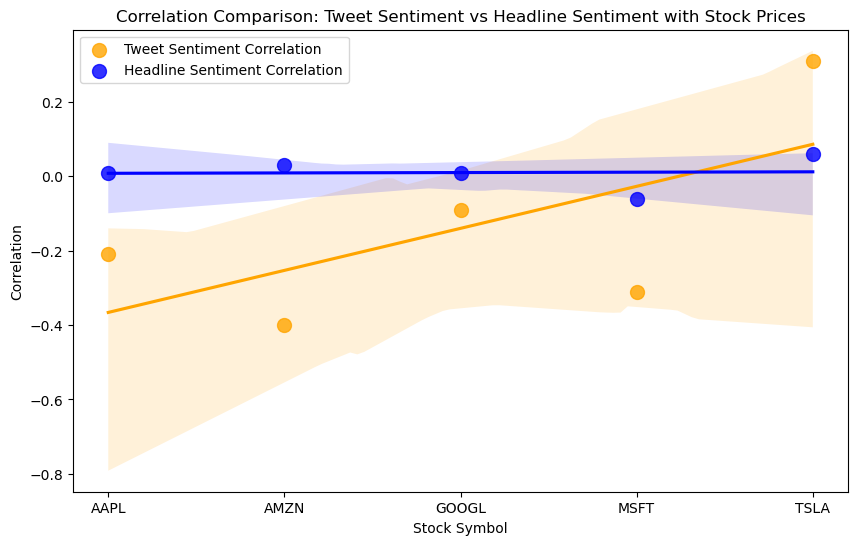

In [59]:

comparison_df['Stock_Num'] = comparison_df['Stock'].astype('category').cat.codes
plt.figure(figsize=(10, 6))

# Plot tweet sentiment correlations with line of best fit
sns.regplot(x='Stock_Num', y='Tweet Sentiment Correlation', data=comparison_df, marker='o', label='Tweet Sentiment Correlation', color='orange', scatter_kws={'s': 100})
# Plot headline sentiment correlations with line of best fit
sns.regplot(x='Stock_Num', y='Headline Sentiment Correlation', data=comparison_df, marker='o', label='Headline Sentiment Correlation', color='blue', scatter_kws={'s': 100})


plt.xticks(ticks=comparison_df['Stock_Num'], labels=comparison_df['Stock'])


plt.title('Correlation Comparison: Tweet Sentiment vs Headline Sentiment with Stock Prices')
plt.xlabel('Stock Symbol')
plt.ylabel('Correlation')
plt.legend()

plt.show()

Correlation between mean tweet frequency and headline sentiment: 0.84


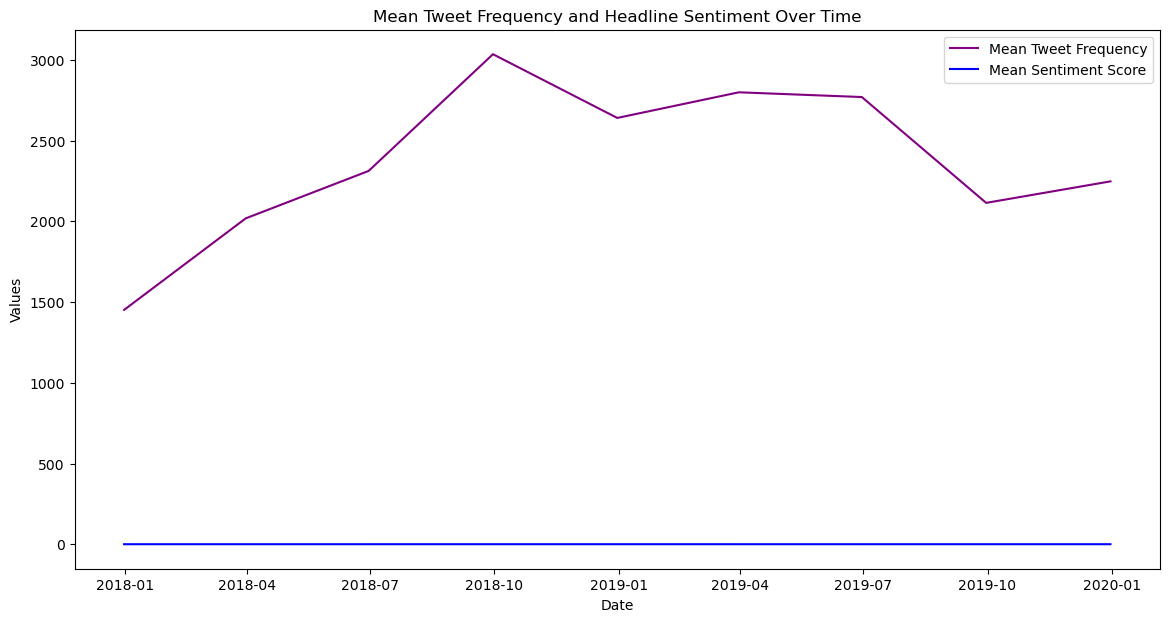

In [60]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure date columns are in datetime format
resampled_tweet_frequency['Date'] = pd.to_datetime(resampled_tweet_frequency['Date'])
resampled_sentiment['Date'] = pd.to_datetime(resampled_sentiment['Date'])

# Merge the two datasets on date
merged_data = pd.merge(resampled_tweet_frequency, resampled_sentiment, on='Date', how='inner')

# Calculate the correlation between mean tweet frequency and headline sentiment
correlation = merged_data['Frequency'].corr(merged_data['Sentiment_Pred_Mapped'])
print(f'Correlation between mean tweet frequency and headline sentiment: {correlation:.2f}')

# Plotting the mean tweet frequency and headline sentiment over time
plt.figure(figsize=(14, 7))

# Plot mean tweet frequency
sns.lineplot(data=merged_data, x='Date', y='Frequency', label='Mean Tweet Frequency', color='purple')

# Plot headline sentiment
sns.lineplot(data=merged_data, x='Date', y='Sentiment_Pred_Mapped', label='Mean Sentiment Score', color='blue')

# Add title and labels
plt.title('Mean Tweet Frequency and Headline Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Values')

# Display legend
plt.legend()

# Show plot
plt.show()